In [1]:
# Hi, welcome back to my analysis on Netflix Shows 
# Link to the dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows
# I did learn a lot on multiple pages like stack overflow, google,.. so some of the codes might be similar to codes which you could find on the Internet
# Thank you for reading, I've only just begun doing, if you spot any mistake/unprofessional coding please let me know. Thank you!

In [2]:
# First of all, I'm gonna download the datasets by using the opendatasets package
# I have just used it the first time, all of the time I did was download the file which was very unprofessional
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv'

In [4]:
# The username and key can be found in kaggle.json file which you can download in your account page

In [5]:
od.download(dataset, force = True)

100%|██████████| 1.34M/1.34M [00:00<00:00, 6.57MB/s]

In [6]:
import os

In [7]:
data_dir = './netflix-shows'

In [8]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'netflix_titles.csv']

In [9]:
import pandas as pd

In [10]:
# After setting the directory, read the files
netflix_df = pd.read_csv('netflix_titles.csv')

In [11]:
# Glance through the dataset
netflix_df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [12]:
# Import neccesasry packages for the analysis
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import calendar as cld
# Since most of columns contain words, strings so we should import a wordcloud for word analysis later
from wordcloud import WordCloud

In [13]:
# Summary of the dataset, already we can see that there are several columns containing null
netflix_df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [14]:
# Since these null values may affect the overall analysis so I will keep it that way
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
netflix_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
# Okay so now after seeing that there's only 2 types of shows : Movie and TV show, we would like to see which one is produced more ?

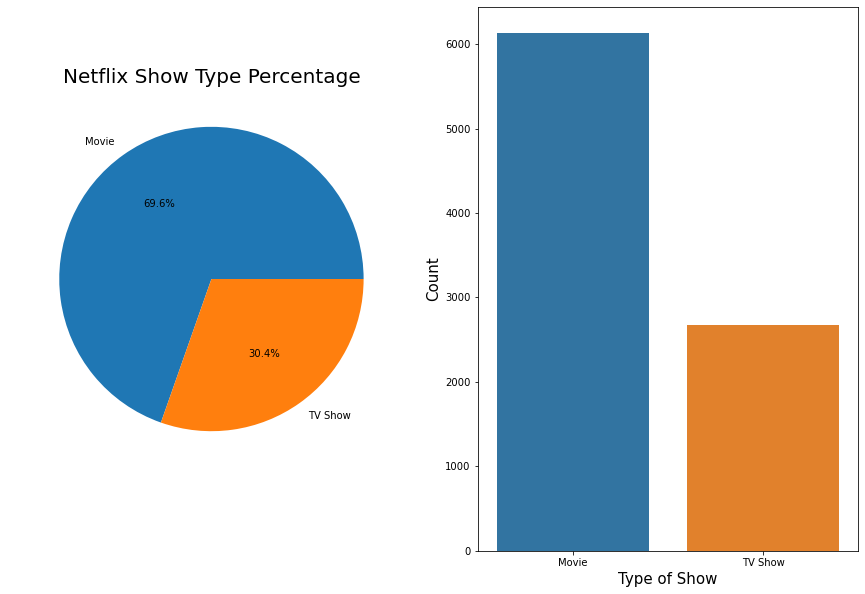

In [17]:
plt.subplot(1,2,1)
netflix_df['type'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = False, figsize = (15,10))
plt.title('Netflix Show Type Percentage', fontsize = 20)
plt.ylabel(' ')
plt.subplot(1,2,2)
sns.barplot(x = pd.DataFrame(netflix_df['type'].value_counts()).index, y = netflix_df['type'].value_counts())
plt.xlabel('Type of Show', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [18]:
# 70% of the shows are Movies, so I guess people wouldn't like to watch the daily TV show huh ?

In [19]:
# Next , I want to see how much contents they uploaded over the time, by month and year of course

In [20]:
# Change to datetime type for easier extraction
netflix_df['date_added'] = netflix_df['date_added'].astype('datetime64[ns]')

In [21]:
# Drop Null value, why not
netflix_datetime = netflix_df[['date_added']].dropna()

In [22]:
# Extract Year and Month project into another 3 columns 
netflix_datetime['Year'] = pd.DatetimeIndex(netflix_datetime['date_added']).year
netflix_datetime['Month Number'] = pd.DatetimeIndex(netflix_datetime['date_added']).month
netflix_datetime['Month'] = netflix_datetime['Month Number'].apply(lambda x: cld.month_abbr[x])

In [23]:
netflix_datetime 

date_added  Year  Month Number Month
0    2021-09-25  2021             9   Sep
1    2021-09-24  2021             9   Sep
2    2021-09-24  2021             9   Sep
3    2021-09-24  2021             9   Sep
4    2021-09-24  2021             9   Sep
...         ...   ...           ...   ...
8802 2019-11-20  2019            11   Nov
8803 2019-07-01  2019             7   Jul
8804 2019-11-01  2019            11   Nov
8805 2020-01-11  2020             1   Jan
8806 2019-03-02  2019             3   Mar

[8797 rows x 4 columns]

In [24]:
# Adding a month order so we can sort them later
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [25]:
netflix_release_count = netflix_datetime[['Year','Month']].groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T

In [26]:
# So after using unstack, we have a very beautiful table here, we can do the heat map to see which month in a year had the most uploads
netflix_release_count

Year   2008  2009  2010  2011  2012  2013  2014  2015  2016   2017   2018  \
Month                                                                       
Jan     1.0   0.0   0.0   0.0   0.0   0.0   2.0   1.0  43.0   72.0  129.0   
Feb     1.0   0.0   0.0   0.0   1.0   0.0   2.0   4.0  15.0   82.0   87.0   
Mar     0.0   0.0   0.0   0.0   0.0   1.0   0.0   5.0  17.0  125.0  173.0   
Apr     0.0   0.0   0.0   0.0   0.0   0.0   2.0   5.0  22.0   93.0  115.0   
May     0.0   1.0   0.0   1.0   0.0   0.0   0.0   6.0  13.0   86.0   97.0   
Jun     0.0   0.0   0.0   0.0   0.0   0.0   1.0   6.0  18.0   94.0   78.0   
Jul     0.0   0.0   0.0   0.0   0.0   0.0   1.0   7.0  28.0   79.0  152.0   
Aug     0.0   0.0   0.0   0.0   0.0   1.0   1.0   2.0  34.0  115.0  164.0   
Sep     0.0   0.0   0.0   1.0   0.0   2.0   1.0   7.0  48.0  113.0  124.0   
Oct     0.0   0.0   0.0  11.0   0.0   3.0   4.0  14.0  51.0  126.0  191.0   
Nov     0.0   1.0   1.0   0.0   1.0   2.0   4.0   4.0  44.0   85.0  154.0   
Dec     0.0   0.0   0.0   0.0   1.0   2.0   6.0  21.0  96.0  118.0  185.0   

Year    2019   2020   2021  
Month                       
Jan    153.0  205.0  132.0  
Feb    148.0  114.0  109.0  
Mar    172.0  137.0  112.0  
Apr    162.0  177.0  188.0  
May    139.0  157.0  132.0  
Jun    168.0  156.0  207.0  
Jul    157.0  146.0  257.0  
Aug    131.0  129.0  178.0  
Sep    123.0  168.0  183.0  
Oct    193.0  167.0    0.0  
Nov    255.0  154.0    0.0  
Dec    215.0  169.0    0.0

In [27]:
netflix_release_count.max()
# Max contents produced in a month

Year
2008      1.0
2009      1.0
2010      1.0
2011     11.0
2012      1.0
2013      3.0
2014      6.0
2015     21.0
2016     96.0
2017    126.0
2018    191.0
2019    255.0
2020    205.0
2021    257.0
dtype: float64

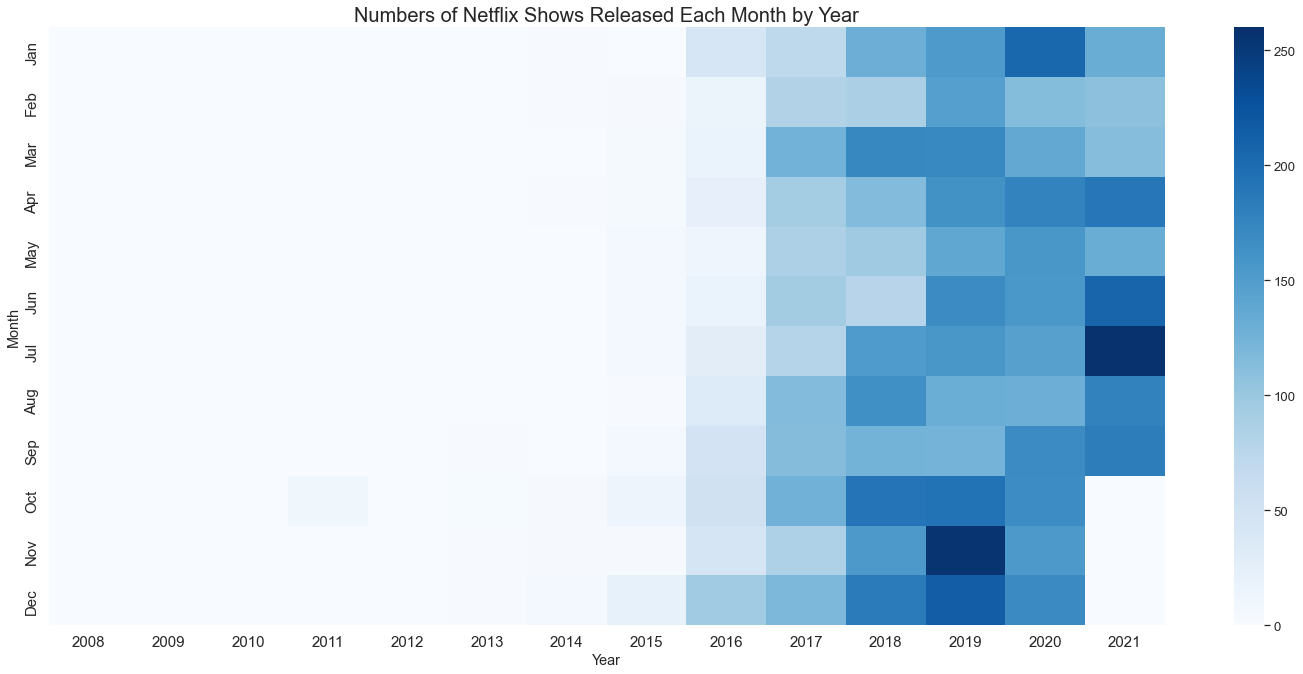

In [28]:
# Heatmap on Number of Netflix shows released by year, month
sns.set(rc = {'figure.figsize':(25,11)}, font_scale = 1.2)
sns.heatmap(netflix_release_count, vmin = 0 , vmax = 260, cmap = 'Blues')
plt.xticks(np.arange(0.5,len(netflix_release_count.columns)), netflix_release_count.columns, fontsize = 15)
plt.yticks(np.arange(0.5, len(netflix_release_count.index)),netflix_release_count.index, fontsize = 15)
plt.title('Numbers of Netflix Shows Released Each Month by Year', fontsize = 20)
plt.show()

In [29]:
# This plot illustrate that contents are usually produced in the 2nd half of a year, especially around Summer and afterward
# Small producers should focus on producing contents around January or December to avoid huge amount of contents created at a same time, which could attract away viewers

In [30]:
# Next, let's do the rating count to see which rating takes up the most, You can already guess what It is, Mature contents :)

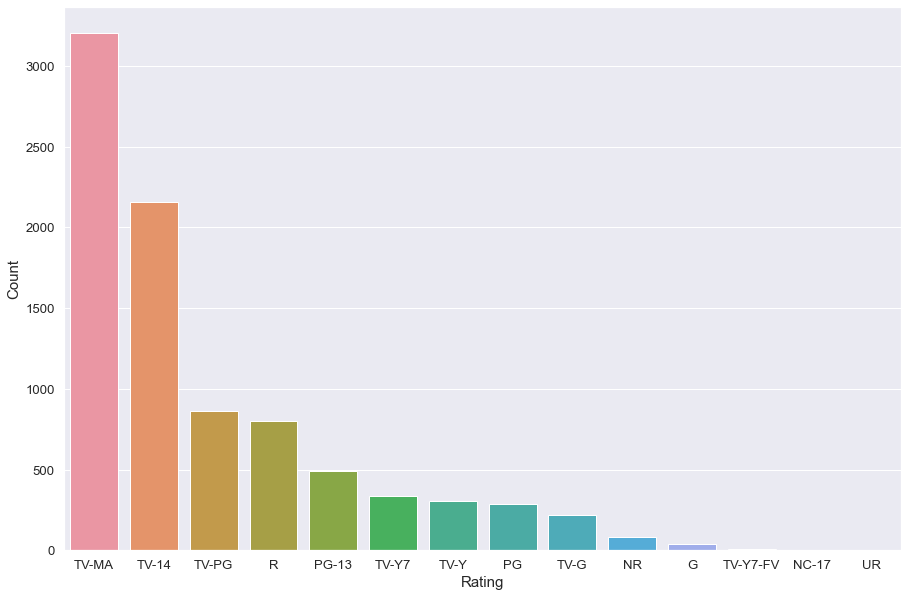

In [31]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'rating', data = netflix_df, order = netflix_df['rating'].value_counts().index[0:14])
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [32]:
# Suprisingly, hugh amounts of contents are Mature and and over 14 years old, meaning that children shouldn't use Netflix for shows, instead they shoudl choose Cartoon Network, Disney Channel,etc for their entertainment
# The smallest amounts are in G-rated, meaning that for all ages, so kids sometimes can enjoy shows with theri parents on Netflix as well

In [33]:
# Next, I would like to see the Movie type category, since it takes up to 70% of the contents on Netflix

In [34]:
# Assign data into another table
# Still, don't want to ruin the perfect original dataset, null values are welcomed
netflix_movie = netflix_df[netflix_df['type'] == 'Movie']

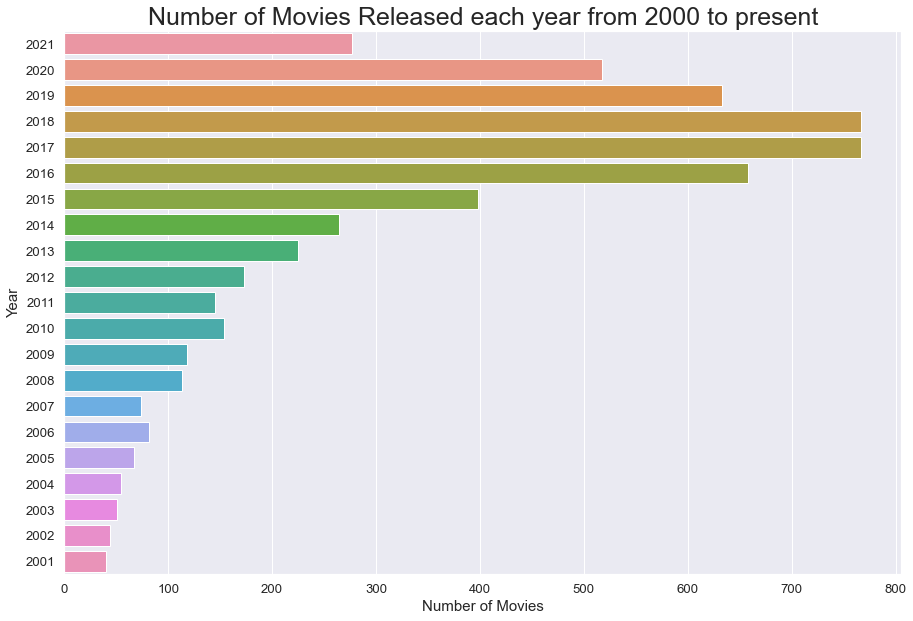

In [35]:
# I actually added a pretty long code here, but still better than assign them to another table so we had to put in several lines, that's not professional in my opinion
# The data below are sorted for year 2000 later only
plt.figure(figsize = (15,10))
sns.countplot(y = 'release_year', data = netflix_movie[netflix_movie['release_year'] > 2000] , order = netflix_movie[netflix_movie['release_year'] > 2000]['release_year'].value_counts().sort_index(ascending = False).index)
plt.xlabel('Number of Movies', fontsize = 15)
plt.ylabel('Year', fontsize = 15)
plt.title('Number of Movies Released each year from 2000 to present', fontsize = 25)
plt.show()

In [36]:
# The number of contents rise over the year and reach its peak in 2017, 2018 thanks to the development of technology
# More machines to help us do chores, more contents for us to sit down and watch, and eat the same time :)
# Okay back to the topic, we could see that in 2007 not many movies were made, but only after 10 years, the amounts of movies released are insane
# Just like back in the day, first airplane was in 1903 and first man on Moon was in 1969, time sure flies as well as technology

In [37]:
# Move on to the duration of movies, let's see how many houurs a person sit down and watch a movie, I guess it's not going to be longer than 2 hours for sure

In [38]:
# I actually want to ignore some messages here since changing the files caused some errors messages so I want to make it look better
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Since Duration for the movie is still in string and it has min, I would like to remove it for plotting later
netflix_movie['duration'] = netflix_movie['duration'].str.replace(' min','')
netflix_movie['duration'] = netflix_movie[netflix_movie['duration'].notnull()]['duration']
netflix_movie['duration'] = netflix_movie['duration'].fillna(0)
# Lastly, change the type to int
netflix_movie['duration'] = netflix_movie['duration'].astype(int)

In [40]:
netflix_movie['duration']
# So now we can plot the data using kdeplot, a perfect plot to show the density of the movie's duration

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int32

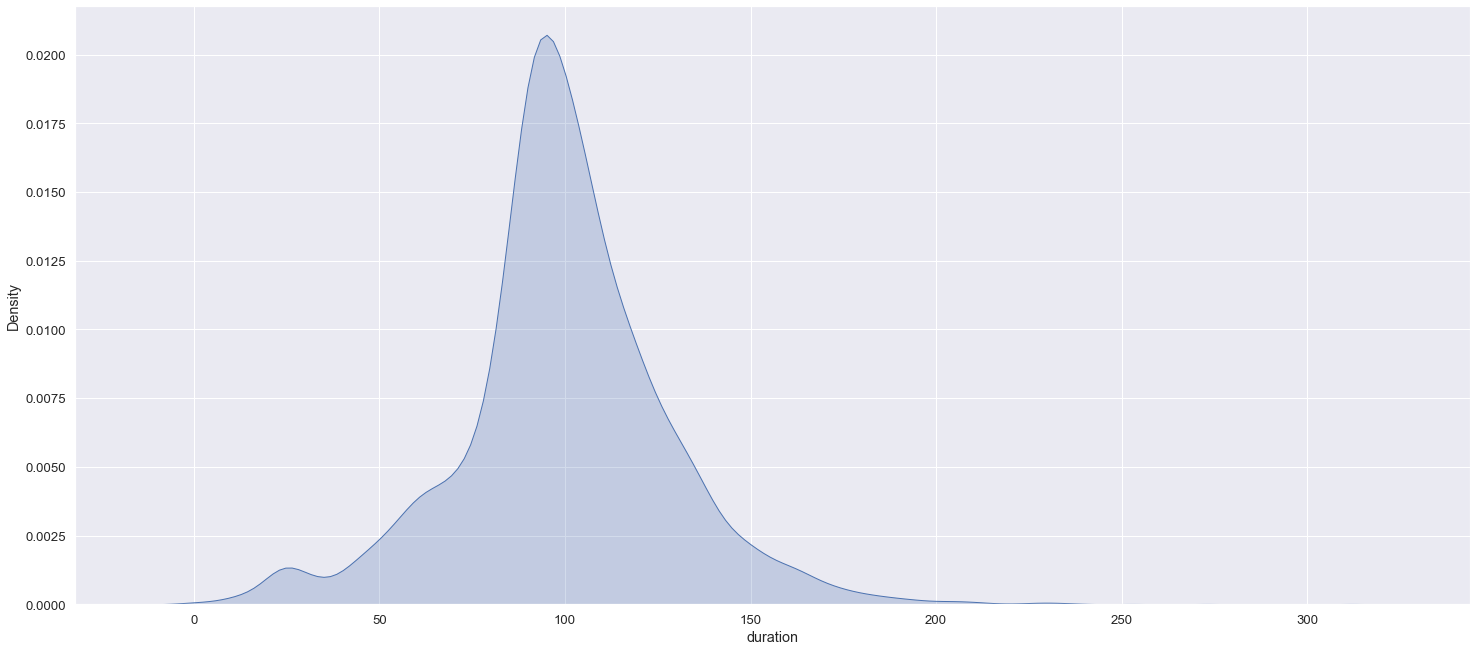

In [41]:
sns.kdeplot(data = netflix_movie, x = 'duration', shade = True)
plt.show()

In [42]:
# Wow, as expected, people don't want to sit down and watch a 3-hour-movie, around 90 minutes is the best duration for movies
# But still, there are some movies which are longer than 150 minutes, they must be the great movies right, you can't expect a person to sit for 150+mins to watch a boring movie

In [43]:
# Move on to the wordcloud, I would call it genre to see which genre producers made the most

In [44]:
genre = WordCloud(max_font_size = 50, max_words = 20, background_color = 'white').generate(','.join(netflix_df['listed_in']))

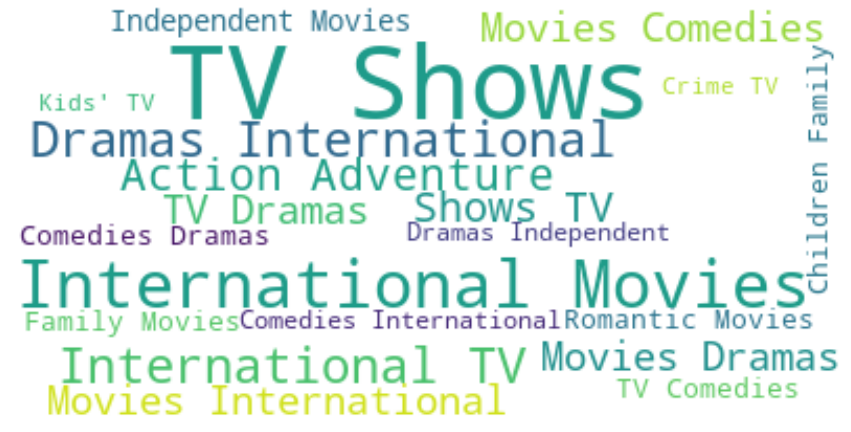

In [45]:
plt.figure(figsize = (15,10))
plt.imshow(genre, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Wooh, drama,comedy, International and Romantic ? Sure, they are very popular, since Korean's romantic movies are getting popular nowadays and number of single man as well 
# Oddly, most movies are for mature audiences, we could see here there are several shows for children as well, maybe Netflix want to target kid audiences as well ?

In [47]:
# Next, let's see what director appears the most in these movies, shows

In [48]:
netflix_df['director'].dropna() 

0                     Kirsten Johnson
2                     Julien Leclercq
5                       Mike Flanagan
6       Robert Cullen, José Luis Ucha
7                        Haile Gerima
                    ...              
8801                  Majid Al Ansari
8802                    David Fincher
8804                  Ruben Fleischer
8805                     Peter Hewitt
8806                      Mozez Singh
Name: director, Length: 6173, dtype: object

In [49]:
director = WordCloud(max_font_size = 50, max_words = 20, background_color = 'white').generate(','.join(netflix_df['director'].dropna()))

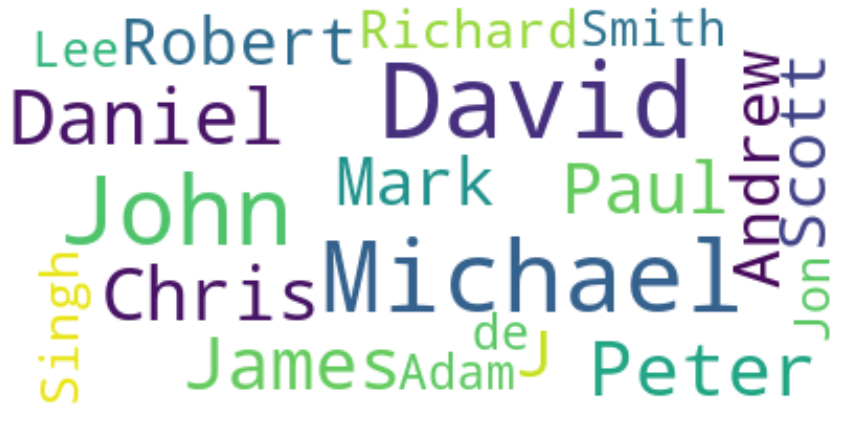

In [50]:
plt.figure(figsize = (15,10))
plt.imshow(director, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [51]:
# Ah It's Michael in Michael Bay, the Director for the Transformers , a very very talented guy, I love Transformer a lot
# Well it's right to say that there are still a lot of " Michael" out there
# And next one is David in David Fincher I think
# Well since I don't know much about movie industry ( but I watch tons of it), let's move onto which countries produce movies the most

In [52]:
# We all know, It's the USA, with Holywood they are the center of the movie industry, say along Netflix

In [53]:
top30_content_countries = netflix_df[['country']].dropna().groupby('country').value_counts().sort_values(ascending = False).head(30)

In [54]:
top30_content_countries

country
United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
United Kingdom, United States      75
Philippines                        75
United States, Canada              73
Germany                            67
China                              66
Thailand                           61
Argentina                          56
Hong Kong                          53
United States, United Kingdom      47
Italy                              45
Cana

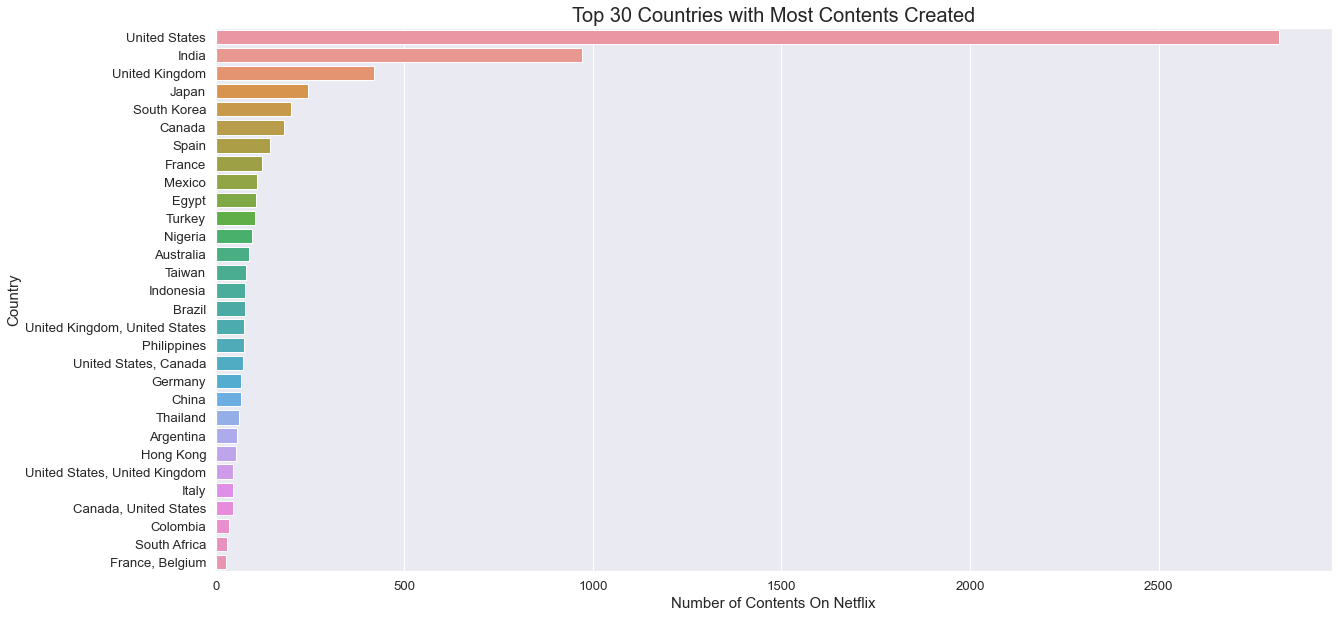

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(y = top30_content_countries.index, x = list(top30_content_countries))
plt.title('Top 30 Countries with Most Contents Created', fontsize = 20)
plt.xlabel('Number of Contents On Netflix', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.show()

In [56]:
# Nothing much to say here, USA has dominating this field a long time in the past and continue dominating in the future

In [57]:
# Then, I would like to show you which title has the most Seasons ( hope they are not overated or getting repetitive for money)

In [58]:
netflix_seasons = netflix_df[netflix_df['type'] == 'TV Show'][['title','duration']]

In [59]:
netflix_seasons['duration'] = netflix_seasons['duration'].str.replace(' .*','')

In [60]:
netflix_seasons['duration'] = netflix_seasons['duration'].astype(int)

In [61]:
netflix_seasons = netflix_seasons.sort_values('duration', ascending=False)

In [62]:
netflix_seasons

title  duration
548            Grey's Anatomy        17
2423             Supernatural        15
4798                     NCIS        15
1354                Heartland        13
4220   COMEDIANS of the world        13
...                       ...       ...
3853          I Have a Script         1
3852                    Abyss         1
3851           Unchained Fate         1
3850         The Missing Menu         1
3696  Record of Grancrest War         1

[2676 rows x 2 columns]

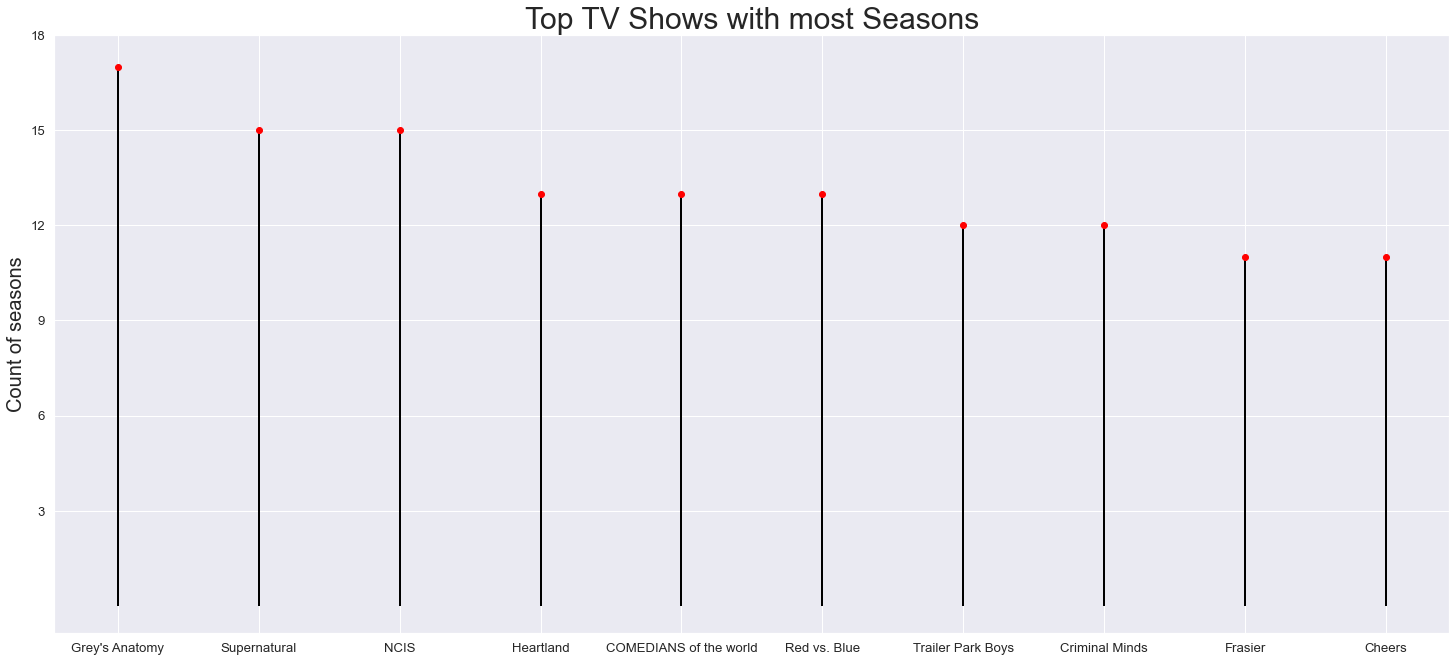

<Figure size 720x720 with 0 Axes>

In [63]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,10))
x = netflix_seasons['title'].head(10)
y = netflix_seasons['duration'].head(10)
ax.vlines(x , ymin = 0, ymax = y, color = 'black', linewidths = 2)
ax.plot(x,y, 'o', color = 'red')
ax.set_yticks([3,6,9,12,15,18])
ax.set_title('Top TV Shows with most Seasons', fontsize = 30)
ax.set_ylabel('Count of seasons', fontsize = 20)
plt.show()

In [64]:
# Grey's Anatomy, the produders said It would end after season 19 but we shall see, a very very long and lasting legacy, up to 17 seasons already and more in the future
# Next is Supernatural, gotta say the fantasy genre sure lives long 
# Anyway, Let's move onto the analysis on country America, they are the #1 in the movie industry right ?

In [65]:
# I wanted to do the treemap plot to see if It's good but turns out there are tons of the directors in the industry, but luckily it showed the top in the lef
# You can hover over it to see how many movies they made

In [66]:
netflix_america = netflix_df[netflix_df['country'] == 'United States']

In [67]:
netflix_america = netflix_america.dropna()

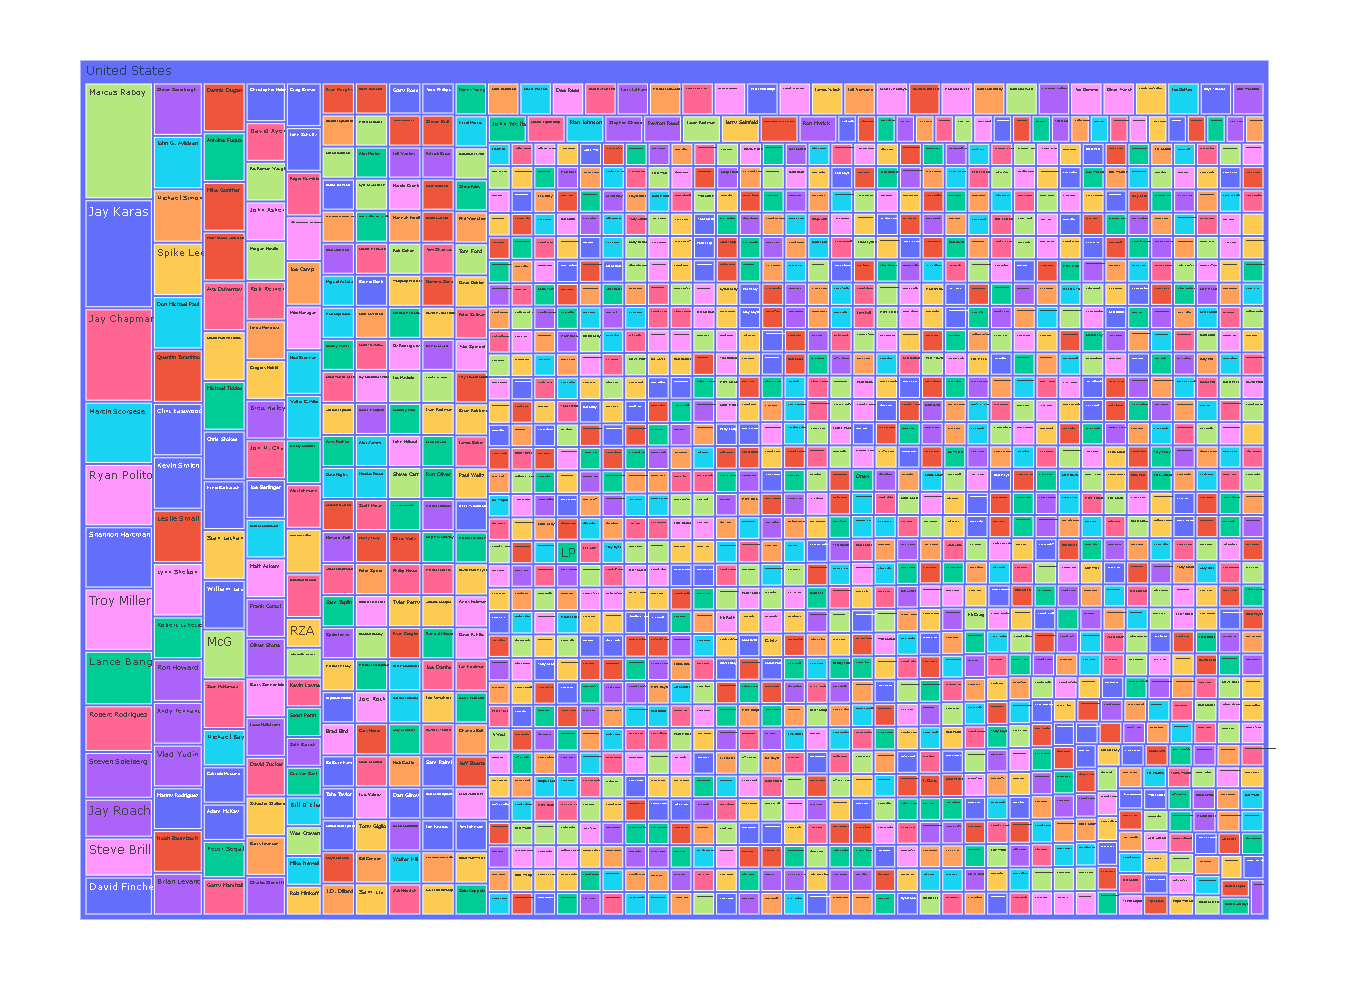

In [68]:
treemap_nfa = px.treemap(netflix_america, path = ['country','director'],
                         color = 'director')
treemap_nfa.update_layout(width = 1300, height = 1000)
treemap_nfa.show()

In [69]:
# Okay, this is the end of my analysis
# Overall, USA still dominates the market, other countries should start learning how the Americans do it so they can have the Art for themself
# Thanks for viewing my analysis, US's Movies are the best!!!